3. Correlation Analysis of Acquiring Firms’ Stocks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Importing file
file_path = '/content/Diversified Holdings  Conglomerates.csv'
df = pd.read_csv(file_path)
df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Index
0,08/06/2024,78.60,79.80,77.00,77.50,46,4402,341675.2,HHL
1,08/05/2024,78.00,79.00,78.00,78.10,20,4783,373858.6,HHL
2,08/04/2024,79.50,79.50,77.90,78.00,97,74038,5789038.0,HHL
3,08/01/2024,79.90,79.90,79.50,79.50,60,134488,10693595.7,HHL
4,7/31/24,78.50,79.90,78.50,79.60,47,37376,2963064.6,HHL
...,...,...,...,...,...,...,...,...,...
19439,12/07/2000,71.75,71.75,71.75,71.75,2,300,21525.0,HAYL
19440,12/05/2000,71.25,71.25,71.25,71.25,3,2700,192375.0,HAYL
19441,12/04/2000,71.75,71.75,71.00,71.25,15,5000,356100.0,HAYL
19442,12/03/2000,71.50,71.50,70.75,71.25,20,13100,931225.0,HAYL


Stock Price Data:
      HHL   HAYL    JKH
0    47.0   28.0  93.00
1    48.0   28.0  95.00
2    48.0   28.5  95.00
3    48.1   28.1  95.25
4    48.2   28.9  95.25
..    ...    ...    ...
292   NaN  355.0    NaN
293   NaN  365.0    NaN
294   NaN  349.0    NaN
295   NaN  348.7    NaN
296   NaN  349.0    NaN

[297 rows x 3 columns]
Correlation Matrix of Daily Returns:
          HHL      HAYL       JKH
HHL   1.00000  0.002560 -0.008800
HAYL  0.00256  1.000000 -0.003469
JKH  -0.00880 -0.003469  1.000000


<ipython-input-9-0448a1671515>:49: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_df.pct_change().dropna()


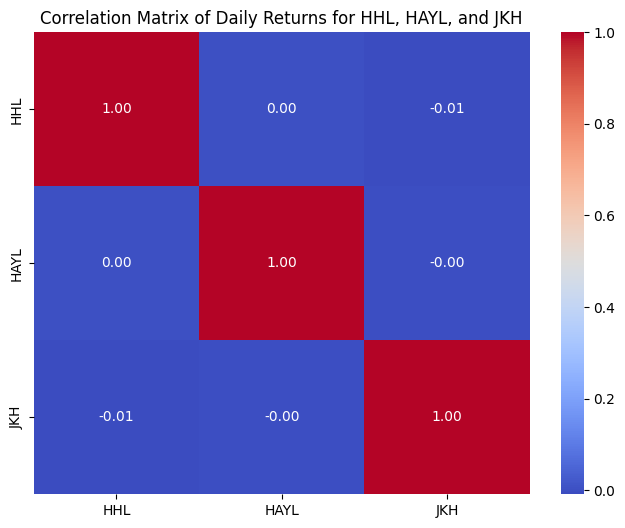

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load data from the CSV file
# Adjust the file path to your CSV file
file_path = '/content/Diversified Holdings  Conglomerates.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Step 2: Convert 'Trade Date' to datetime format
# Using `dayfirst=False` and inferring the datetime format to accomodate the dates like "7/31/24".
data['Trade Date'] = pd.to_datetime(data['Trade Date'], format='%m/%d/%y', errors='coerce')

# Step 3: Define tickers and their specific analysis periods
# Dictionary to store tickers with their respective date ranges
tickers = {
    'HHL': ('2010-10-06', '2011-03-01'),  # Hemas Holdings PLC
    'HAYL': ('2012-05-01', '2012-11-01'), # Hayleys PLC (6-month period)
    'JKH': ('2004-06-29', '2004-11-01')   # John Keells Holdings PLC
}

# Initialize a dictionary to hold the close price data for each ticker
stock_data = {}

# Step 4: Filter data for each ticker and date range
for ticker, (start_date, end_date) in tickers.items():
    # Filter data for the current ticker and date range
    filtered_data = data[(data['Trade Date'] >= start_date) & (data['Trade Date'] <= end_date)]

    # Assuming that the ticker symbol is part of the column or index,
    # we need to filter by ticker name or some identification method.
    # Here, we are assuming you have a way to identify each company's data.
    # You might need to replace 'Ticker' with the actual column that identifies your stocks
    # Example: filtered_data = data[data['Ticker'] == ticker]

    # Store the Close prices for each ticker, and reset the index to avoid potential conflicts
    stock_data[ticker] = filtered_data.set_index('Trade Date')['Close (Rs.)'].reset_index(drop=True)

# Convert the dictionary into a DataFrame for easier manipulation
stock_df = pd.DataFrame(stock_data)

# Display the stock data collected
print("Stock Price Data:")
print(stock_df)

# Step 5: Calculate Daily Returns
# Calculate the daily percentage change to get returns
daily_returns = stock_df.pct_change().dropna()

# Step 6: Compute Correlations
# Calculate pairwise correlation coefficients using the daily returns data
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

# Step 7: Visualize the Correlation Matrix
# Use a heatmap to visually represent the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns for HHL, HAYL, and JKH')
plt.show()

In [ ]:
# Re-import libraries after reset
import pandas as pd

# Reload the dataset
new_file_path = '/content/merged_stock_data (9).csv'
new_data = pd.read_csv(new_file_path)

# Convert 'Trade Date' to datetime format for easier processing
new_data['Trade Date'] = pd.to_datetime(new_data['Trade Date'])

# Sort data by Trade Date and Acquirer Name
new_data = new_data.sort_values(by=['Acquirer Name', 'Trade Date'])

# Calculate daily returns for each stock (grouped by 'Acquirer Name')
new_data['Daily Return'] = new_data.groupby('Acquirer Name')['Close (Rs.)'].pct_change()

# Filter for pre-M&A and post-M&A periods
pre_mna_data = new_data[new_data['Period'] == 'Pre-M&A']
post_mna_data = new_data[new_data['Period'] == 'Post-M&A']

# Resolve duplicate entries by averaging daily returns for duplicates
pre_mna_data_cleaned = pre_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False).mean()
post_mna_data_cleaned = post_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False).mean()

# Pivot the cleaned data for correlation analysis
pre_mna_returns_cleaned = pre_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')
post_mna_returns_cleaned = post_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')

# Compute correlation matrices
pre_mna_correlation_cleaned = pre_mna_returns_cleaned.corr()
post_mna_correlation_cleaned = post_mna_returns_cleaned.corr()

# Display cleaned correlation matrices
import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned Pre-M&A Correlation Matrix", dataframe=pre_mna_correlation_cleaned)
tools.display_dataframe_to_user(name="Cleaned Post-M&A Correlation Matrix", dataframe=post_mna_correlation_cleaned)


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Re-import libraries after reset
import pandas as pd
import pandas as pd
import numpy as np
# Reload the dataset
new_file_path = '/content/merged_stock_data (9).csv'
new_data = pd.read_csv(new_file_path)

# Convert 'Trade Date' to datetime format for easier processing
new_data['Trade Date'] = pd.to_datetime(new_data['Trade Date'])

# Sort data by Trade Date and Acquirer Name
new_data = new_data.sort_values(by=['Acquirer Name', 'Trade Date'])

# Calculate daily returns for each stock (grouped by 'Acquirer Name')
new_data['Daily Return'] = new_data.groupby('Acquirer Name')['Close (Rs.)'].pct_change()

# Filter for pre-M&A and post-M&A periods
pre_mna_data = new_data[new_data['Period'] == 'Pre-M&A']
post_mna_data = new_data[new_data['Period'] == 'Post-M&A']

# Select only numeric columns for calculating the mean
numeric_cols = pre_mna_data.select_dtypes(include=np.number).columns.tolist()
# Include 'Trade Date', 'Acquirer Name', and 'Daily Return'
numeric_cols.extend(['Daily Return'])
pre_mna_data = pre_mna_data[numeric_cols]
post_mna_data = post_mna_data[numeric_cols]


# Resolve duplicate entries by averaging daily returns for duplicates
pre_mna_data_cleaned = pre_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()
post_mna_data_cleaned = post_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()

# Pivot the cleaned data for correlation analysis
#pre_mna_returns_cleaned = pre_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')
#post_mna_returns_cleaned = post_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')
# Resolve duplicate entries by averaging daily returns for duplicates
pre_mna_data_cleaned = pre_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()
post_mna_data_cleaned = post_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()
# Compute correlation matrices
pre_mna_correlation_cleaned = pre_mna_data_cleaned.corr()
post_mna_correlation_cleaned = post_mna_data_cleaned.corr()

# Display cleaned correlation matrices
#import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned Pre-M&A Correlation Matrix", dataframe=pre_mna_correlation_cleaned)
#tools.display_dataframe_to_user(name="Cleaned Post-M&A Correlation Matrix", dataframe=post_mna_correlation_cleaned)

KeyError: 'Trade Date'

In [ ]:
# Re-import libraries after reset
import pandas as pd
import numpy as np

# Reload the dataset
new_file_path = '/content/merged_stock_data (9).csv'
new_data = pd.read_csv(new_file_path)

# Convert 'Trade Date' to datetime format for easier processing
new_data['Trade Date'] = pd.to_datetime(new_data['Trade Date'])

# Sort data by Trade Date and Acquirer Name
new_data = new_data.sort_values(by=['Acquirer Name', 'Trade Date'])

# Calculate daily returns for each stock (grouped by 'Acquirer Name')
new_data['Daily Return'] = new_data.groupby('Acquirer Name')['Close (Rs.)'].pct_change()

# Filter for pre-M&A and post-M&A periods
pre_mna_data = new_data[new_data['Period'] == 'Pre-M&A']
post_mna_data = new_data[new_data['Period'] == 'Post-M&A']

# Select only numeric columns for calculating the mean
numeric_cols = pre_mna_data.select_dtypes(include=np.number).columns.tolist()
# Include 'Trade Date', 'Acquirer Name', and 'Daily Return'
numeric_cols.extend(['Trade Date', 'Acquirer Name', 'Daily Return'])
pre_mna_data = pre_mna_data[numeric_cols]
post_mna_data = post_mna_data[numeric_cols]

# Resolve duplicate entries by averaging daily returns for duplicates
pre_mna_data_cleaned = pre_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()
post_mna_data_cleaned = post_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()

# Pivot the cleaned data for correlation analysis
pre_mna_returns_cleaned = pre_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')
post_mna_returns_cleaned = post_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')

# Compute correlation matrices
# The error was here: pre_mna_correlation_cleaned = pre_mna_data_cleaned.corr()
# Changed to use the pivoted data which only contains numeric values
pre_mna_correlation_cleaned = pre_mna_returns_cleaned.corr()
post_mna_correlation_cleaned = post_mna_returns_cleaned.corr()

# Display cleaned correlation matrices
#import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned Pre-M&A Correlation Matrix", dataframe=pre_mna_correlation_cleaned)
#tools.display_dataframe_to_user(name="Cleaned Post-M&A Correlation Matrix", dataframe=post_mna_correlation_cleaned)

ValueError: Data must be 1-dimensional, got ndarray of shape (25842, 2) instead

In [ ]:
pre_mna_returns_cleaned = pre_mna_data_cleaned.pivot(index='Trade Date', columns='Acquirer Name', values='Daily Return')

In [ ]:
# Resolve duplicate entries by averaging daily returns for duplicates
pre_mna_data_cleaned = pre_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()
post_mna_data_cleaned = post_mna_data.groupby(['Trade Date', 'Acquirer Name'], as_index=False)['Daily Return'].mean()

Load the Required Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded data
file_path = '/content/merged datacalculate MV,return.csv'
data = pd.read_csv(file_path)

# Preview the data
print(data.head())


   Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0  2000-03-12        37.5        37.5       37.5         37.5            1   
1  2000-11-12        37.5        37.5       37.5         37.5            1   
2  2000-11-30        38.0        38.0       38.0         38.0            3   
3  2000-12-12        37.5        37.5       37.5         37.5            3   
4  2000-12-14        37.5        37.5       37.5         37.5            4   

   ShareVolume  Turnover (Rs.)   Acquirer Name                        Sector  \
0         3000        112500.0  ACL Cables PLC  Manufacturing and Industrial   
1          100          3750.0  ACL Cables PLC  Manufacturing and Industrial   
2         1000         38000.0  ACL Cables PLC  Manufacturing and Industrial   
3         4400        165000.0  ACL Cables PLC  Manufacturing and Industrial   
4         1100         41250.0  ACL Cables PLC  Manufacturing and Industrial   

   Start Date   Period  Daily Return  MA_20  MA_50

Calculate Daily Returns

In [ ]:
# Convert date column to datetime format
data['Start Date'] = pd.to_datetime(data['Start Date'])

# Sort the data by Date
data = data.sort_values(by=['Start Date'])

# Calculate daily returns for each stock
# Exclude 'Start Date' and any other non-numeric columns
stocks = [col for col in data.columns if col not in ['Start Date'] and data[col].dtype in [np.number]]

for stock in stocks:
    data[f'{stock}_return'] = data[stock].pct_change()

# Drop rows with NaN values resulting from percentage change calculation
data = data.dropna()

# Preview the dataset with returns
print(data.head())

       Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  \
35781  2014-09-10       215.0       215.0     212.00       212.00   
35771  2014-08-27       209.9       211.0     207.00       209.00   
33250  2004-01-15        25.0        25.0      24.75        24.75   
35765  2014-08-19       208.2       210.0     208.00       208.00   
35766  2014-08-20       207.6       207.6     204.50       207.50   

       TradeVolume  ShareVolume  Turnover (Rs.)  \
35781           12         4012        858869.0   
35771           58       304570      64020054.5   
33250           34        37900        944525.0   
35765           39        91126      18972982.5   
35766           16         2014        415156.6   

                          Acquirer Name                Sector  ...  \
35781  Distilleries Co of Sri Lanka PLC  Beverage and Alcohol  ...   
35771  Distilleries Co of Sri Lanka PLC  Beverage and Alcohol  ...   
33250  Distilleries Co of Sri Lanka PLC  Beverage and Alcohol  ...  

<ipython-input-12-a48104f9c39f>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  stocks = [col for col in data.columns if col not in ['Start Date'] and data[col].dtype in [np.number]]
<ipython-input-12-a48104f9c39f>:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[f'{stock}_return'] = data[stock].pct_change()
<ipython-input-12-a48104f9c39f>:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[f'{stock}_return'] = data[stock].pct_change()
<ipython-input-12-a48104f9c39f>:12: FutureWarn

Compute the Correlation Matrix

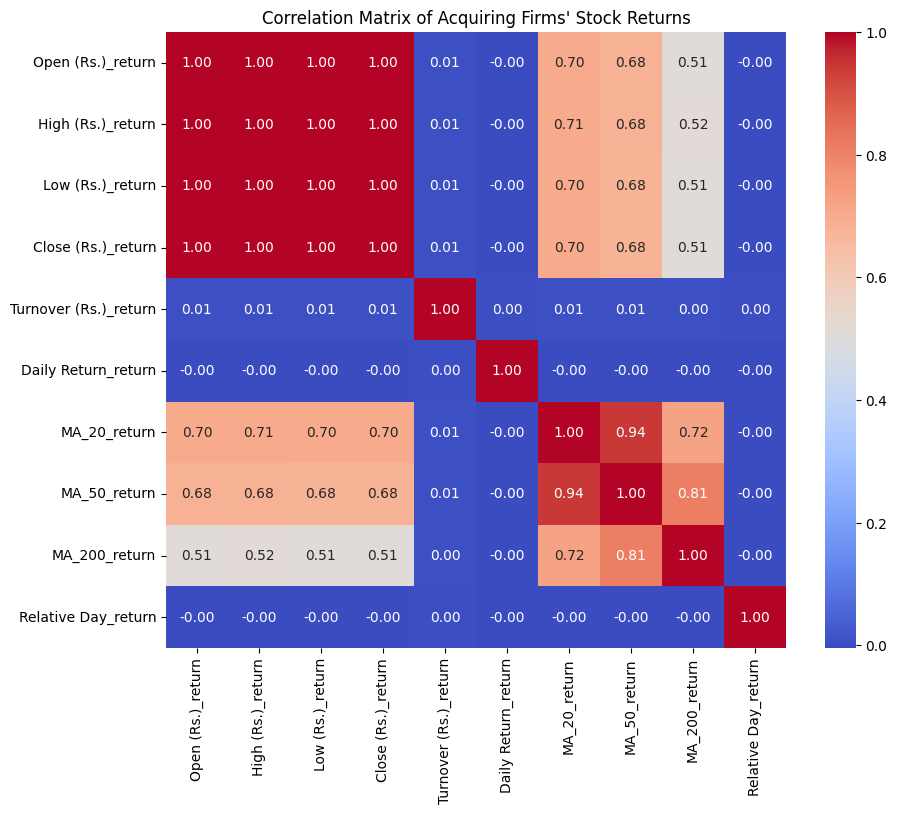

In [ ]:
# Extract the return columns
return_columns = [col for col in data.columns if '_return' in col]

# Calculate the correlation matrix
correlation_matrix = data[return_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Acquiring Firms\' Stock Returns')
plt.show()


Rolling Correlation

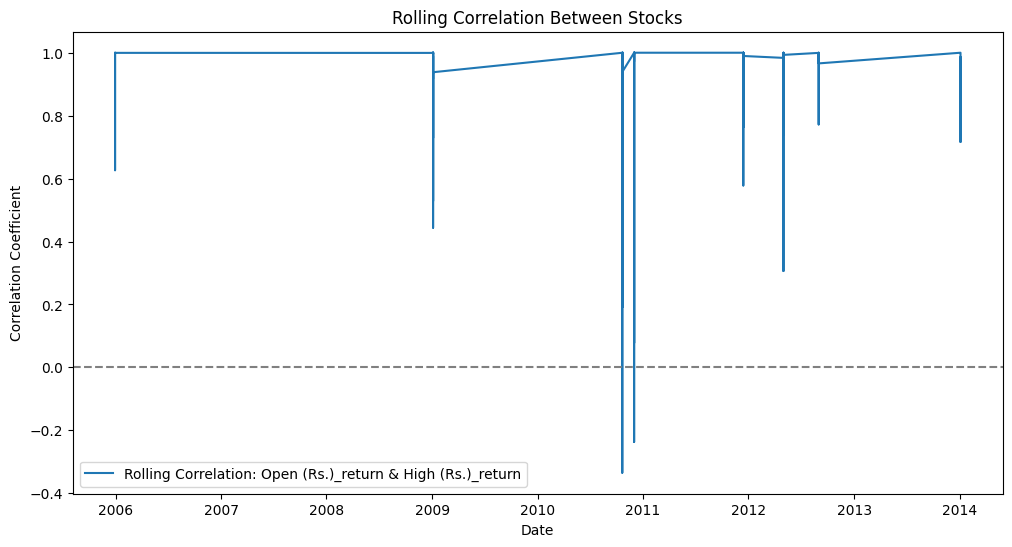

In [ ]:
# Define rolling window size
rolling_window = 20

# Calculate rolling correlation between two example stocks
stock_1 = return_columns[0]  # Replace with actual stock name
stock_2 = return_columns[1]  # Replace with actual stock name

rolling_corr = data[stock_1].rolling(window=rolling_window).corr(data[stock_2])

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(data['Start Date'], rolling_corr, label=f'Rolling Correlation: {stock_1} & {stock_2}')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title('Rolling Correlation Between Stocks')
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Apply K-Means clustering on the correlation matrix
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(correlation_matrix)

# Add cluster labels to the correlation matrix
clustered_data = correlation_matrix.copy()
clustered_data['Cluster'] = cluster_labels

print(clustered_data)


                       Open (Rs.)_return  High (Rs.)_return  Low (Rs.)_return  \
Open (Rs.)_return               1.000000           0.999275          0.999047   
High (Rs.)_return               0.999275           1.000000          0.998786   
Low (Rs.)_return                0.999047           0.998786          1.000000   
Close (Rs.)_return              0.998880           0.999407          0.999302   
Turnover (Rs.)_return           0.006578           0.007411          0.006391   
Daily Return_return            -0.002484          -0.002561         -0.002607   
MA_20_return                    0.702466           0.705352          0.702251   
MA_50_return                    0.682976           0.684770          0.680735   
MA_200_return                   0.513458           0.515452          0.510490   
Relative Day_return            -0.003019          -0.002931         -0.003059   

                       Close (Rs.)_return  Turnover (Rs.)_return  \
Open (Rs.)_return                0.99888

Test 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data
file_path = '/content/merged datacalculate MV,return.csv'
data = pd.read_csv(file_path)

# Convert relevant columns to datetime format
data['Trade Date'] = pd.to_datetime(data['Trade Date'])
data['Start Date'] = pd.to_datetime(data['Start Date'])

# Preview the dataset
data.head()


,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Acquirer Name,Sector,Start Date,Period,Daily Return,MA_20,MA_50,MA_200,Relative Day
0,2000-03-12,37.5,37.5,37.5,37.5,1,3000,112500.0,ACL Cables PLC,Manufacturing and Industrial,2014-01-04,Pre-M&A,NaN,NaN,NaN,NaN,-5046
1,2000-11-12,37.5,37.5,37.5,37.5,1,100,3750.0,ACL Cables PLC,Manufacturing and Industrial,2014-01-04,Pre-M&A,0.000000,NaN,NaN,NaN,-4801
2,2000-11-30,38.0,38.0,38.0,38.0,3,1000,38000.0,ACL Cables PLC,Manufacturing and Industrial,2014-01-04,Pre-M&A,1.333333,NaN,NaN,NaN,-4783
3,2000-12-12,37.5,37.5,37.5,37.5,3,4400,165000.0,ACL Cables PLC,Manufacturing and Industrial,2014-01-04,Pre-M&A,-1.315789,NaN,NaN,NaN,-4771
4,2000-12-14,37.5,37.5,37.5,37.5,4,1100,41250.0,ACL Cables PLC,Manufacturing and Industrial,2014-01-04,Pre-M&A,0.000000,NaN,NaN,NaN,-4769


## Define Pre- and Post-M&A Periods

In [ ]:
pre_mna_days = 1000  # Days before M&A event
post_mna_days = 1000  # Days after M&A event

# Add a column to mark pre- and post-M&A periods
data['Period'] = data.apply(
    lambda row: 'Pre-M&A' if row['Trade Date'] < row['Start Date'] else
                'Post-M&A' if row['Trade Date'] <= row['Start Date'] + pd.Timedelta(days=post_mna_days) else
                'Outside', axis=1
)

# Filter relevant data
relevant_data = data[data['Period'].isin(['Pre-M&A', 'Post-M&A'])]
print(relevant_data.head())


  Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0 2000-03-12        37.5        37.5       37.5         37.5            1   
1 2000-11-12        37.5        37.5       37.5         37.5            1   
2 2000-11-30        38.0        38.0       38.0         38.0            3   
3 2000-12-12        37.5        37.5       37.5         37.5            3   
4 2000-12-14        37.5        37.5       37.5         37.5            4   

   ShareVolume  Turnover (Rs.)   Acquirer Name                        Sector  \
0         3000        112500.0  ACL Cables PLC  Manufacturing and Industrial   
1          100          3750.0  ACL Cables PLC  Manufacturing and Industrial   
2         1000         38000.0  ACL Cables PLC  Manufacturing and Industrial   
3         4400        165000.0  ACL Cables PLC  Manufacturing and Industrial   
4         1100         41250.0  ACL Cables PLC  Manufacturing and Industrial   

  Start Date   Period  Daily Return  MA_20  MA_50  MA_20

Calculate Daily Returns

In [ ]:
# Compute daily returns for each company
companies = data['Acquirer Name'].unique()
for company in companies:
    company_data = data[data['Acquirer Name'] == company]
    data.loc[data['Acquirer Name'] == company, 'Daily Return'] = company_data['Close (Rs.)'].pct_change()

# Drop rows with NaN values after calculation
data = data.dropna(subset=['Daily Return'])


Correlation Analysis for Pre- and Post-M&A Periods

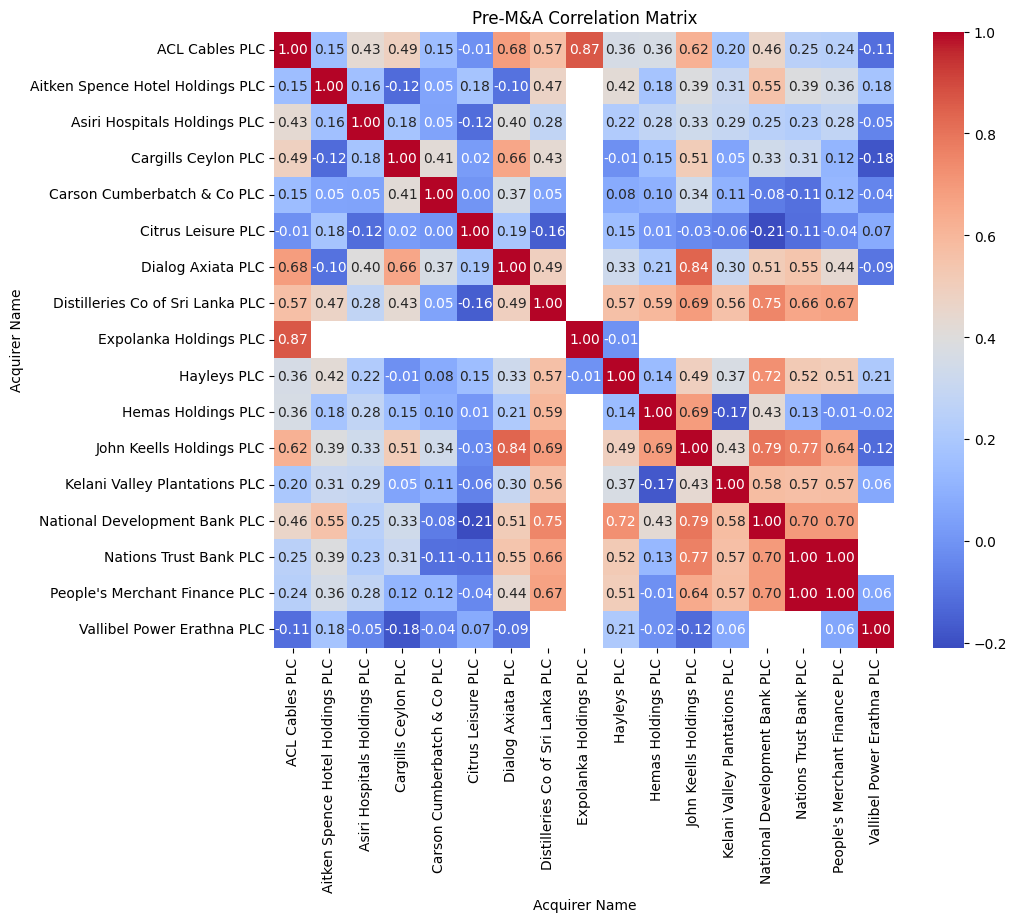

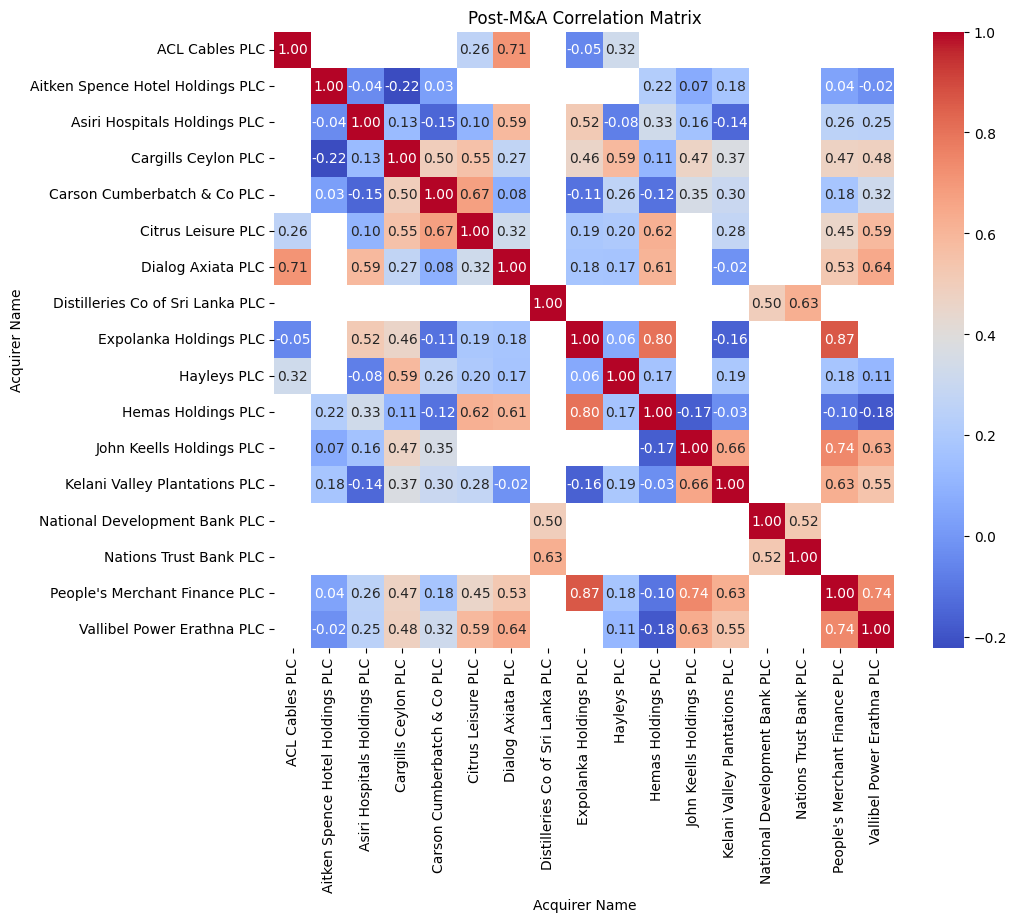

In [ ]:
# Separate pre- and post-M&A data
pre_mna_data = relevant_data[relevant_data['Period'] == 'Pre-M&A']
post_mna_data = relevant_data[relevant_data['Period'] == 'Post-M&A']

# Compute correlation matrices
pre_correlation = pre_mna_data.pivot_table(values='Daily Return', index='Trade Date', columns='Acquirer Name').corr()
post_correlation = post_mna_data.pivot_table(values='Daily Return', index='Trade Date', columns='Acquirer Name').corr()

# Visualize correlations
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(pre_correlation, 'Pre-M&A Correlation Matrix')
plot_correlation_matrix(post_correlation, 'Post-M&A Correlation Matrix')


Analyze Changes in Volatility

Volatility Summary:
Period                             Post-M&A     Pre-M&A
Acquirer Name                                          
ACL Cables PLC                    13.181751   17.921296
Aitken Spence Hotel Holdings PLC  44.653869         NaN
Asiri Hospitals Holdings PLC       9.255652   14.050717
Cargills Ceylon PLC                7.608973  480.758409
Carson Cumberbatch & Co PLC        7.646752         NaN
Citrus Leisure PLC                15.773887   94.121071
Dialog Axiata PLC                  8.462960   16.514836
Distilleries Co of Sri Lanka PLC  15.143766   14.910600
Expolanka Holdings PLC             5.882207    9.063967
Hayleys PLC                             NaN   10.746179
Hemas Holdings PLC                23.206116   15.192687
John Keells Holdings PLC          17.915910   12.193364
Kelani Valley Plantations PLC     14.240508   14.324574
National Development Bank PLC     10.589497   15.237728
Nations Trust Bank PLC             7.806981   12.734123
People's Merchant Finance PL

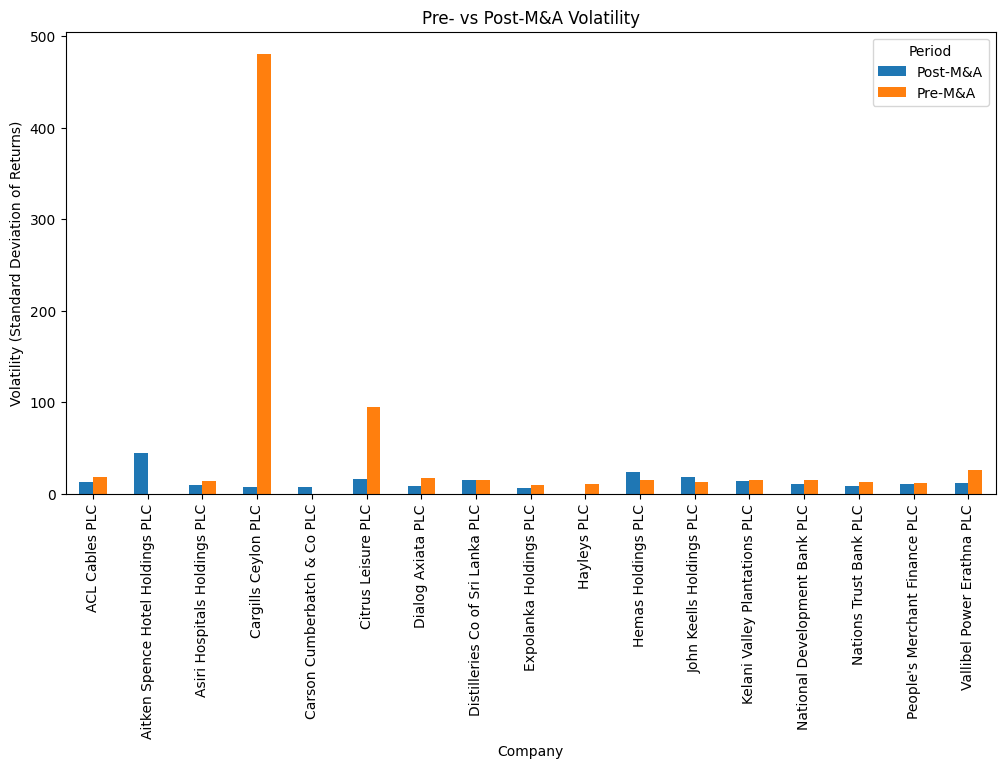

In [ ]:
# Calculate volatility for pre- and post-M&A periods
volatility_summary = relevant_data.groupby(['Acquirer Name', 'Period'])['Daily Return'].std().unstack()

print("Volatility Summary:")
print(volatility_summary)

# Visualize volatility comparison
volatility_summary.plot(kind='bar', figsize=(12, 6), title="Pre- vs Post-M&A Volatility")
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.xlabel('Company')
plt.show()


Dynamic Clustering of Stocks

In [ ]:
# Apply K-Means clustering to post-M&A correlation matrix
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
post_cluster_labels = kmeans.fit_predict(post_correlation)

# Add cluster labels to companies
post_clustered = pd.DataFrame({'Acquirer Name': post_correlation.index, 'Cluster': post_cluster_labels})

print("Post-M&A Clusters:")
print(post_clustered)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=post_clustered)
plt.title("Cluster Distribution Post-M&A")
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Check for missing values
print(post_correlation.isnull().sum())


Acquirer Name
ACL Cables PLC                      12
Aitken Spence Hotel Holdings PLC     8
Asiri Hospitals Holdings PLC         4
Cargills Ceylon PLC                  4
Carson Cumberbatch & Co PLC          4
Citrus Leisure PLC                   5
Dialog Axiata PLC                    5
Distilleries Co of Sri Lanka PLC    14
Expolanka Holdings PLC               6
Hayleys PLC                          5
Hemas Holdings PLC                   4
John Keells Holdings PLC             8
Kelani Valley Plantations PLC        4
National Development Bank PLC       14
Nations Trust Bank PLC              14
People's Merchant Finance PLC        4
Vallibel Power Erathna PLC           5
dtype: int64


In [ ]:
# Impute missing values with zeros
post_correlation_filled = post_correlation.fillna(0)


In [ ]:
# Drop rows and columns with NaNs
post_correlation_cleaned = post_correlation.dropna(axis=0).dropna(axis=1)


Post-M&A Clusters:
                       Acquirer Name  Cluster
0                     ACL Cables PLC        0
1   Aitken Spence Hotel Holdings PLC        2
2       Asiri Hospitals Holdings PLC        0
3                Cargills Ceylon PLC        1
4        Carson Cumberbatch & Co PLC        1
5                 Citrus Leisure PLC        0
6                  Dialog Axiata PLC        0
7   Distilleries Co of Sri Lanka PLC        2
8             Expolanka Holdings PLC        0
9                        Hayleys PLC        0
10                Hemas Holdings PLC        0
11          John Keells Holdings PLC        1
12     Kelani Valley Plantations PLC        1
13     National Development Bank PLC        2
14            Nations Trust Bank PLC        2
15     People's Merchant Finance PLC        1
16        Vallibel Power Erathna PLC        1


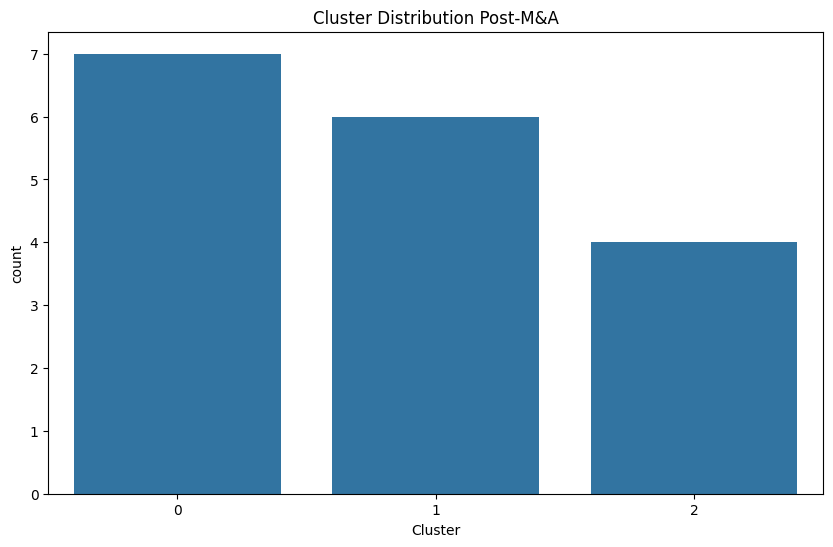

In [ ]:
# Apply K-Means clustering 05/11
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
post_cluster_labels = kmeans.fit_predict(post_correlation_filled)

# Add cluster labels to companies
post_clustered = pd.DataFrame({'Acquirer Name': post_correlation.index, 'Cluster': post_cluster_labels})

print("Post-M&A Clusters:")
print(post_clustered)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=post_clustered)
plt.title("Cluster Distribution Post-M&A")
plt.show()


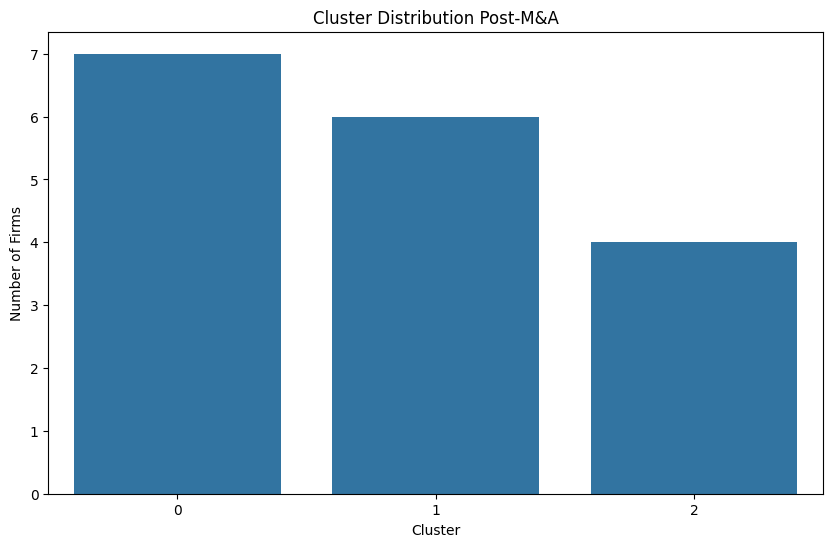

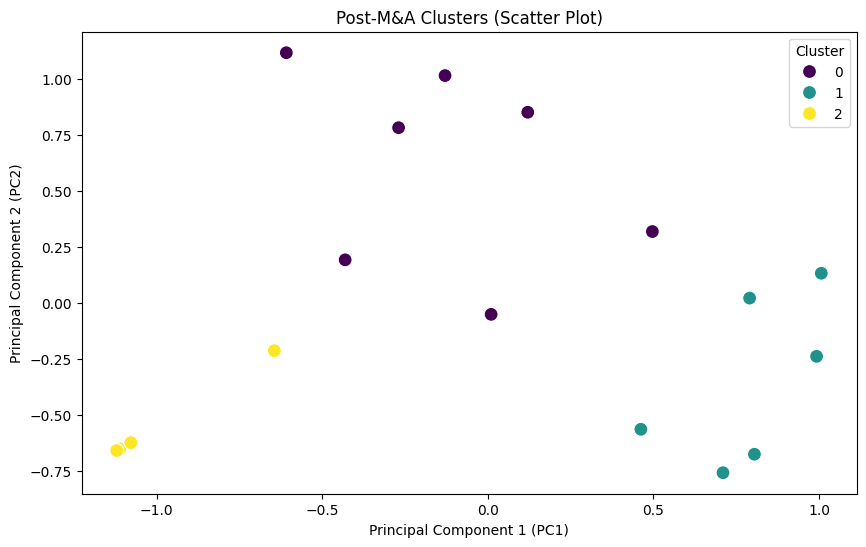

In [ ]:
# Handle missing values by imputing with zeros
post_correlation_filled = post_correlation.fillna(0)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
post_cluster_labels = kmeans.fit_predict(post_correlation_filled)

# Add cluster labels to companies
post_clustered = pd.DataFrame({'Acquirer Name': post_correlation.index, 'Cluster': post_cluster_labels})

# Visualize cluster distribution with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=post_clustered)
plt.title("Cluster Distribution Post-M&A")
plt.xlabel("Cluster")
plt.ylabel("Number of Firms")
plt.show()

# Visualize clusters with a scatter plot (using first two principal components for dimensionality reduction)
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
post_correlation_pca = pca.fit_transform(post_correlation_filled)

# Create a DataFrame for scatter plot
scatter_data = pd.DataFrame(post_correlation_pca, columns=['PC1', 'PC2'])
scatter_data['Cluster'] = post_cluster_labels

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title("Post-M&A Clusters (Scatter Plot)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Add firm names to their respective clusters
post_clustered['Acquirer Name'] = post_correlation.index

# Display firms in each cluster
clustered_firms = post_clustered.groupby('Cluster')['Acquirer Name'].apply(list)

# Display firms per cluster for deeper analysis
#import ace_tools as tools; tools.display_dataframe_to_user(name="Firms by Cluster (Post-M&A)", dataframe=clustered_firms)

clustered_firms
clustered_firms.to_csv('clustered_firms.csv')


Rolling Correlation Analysis

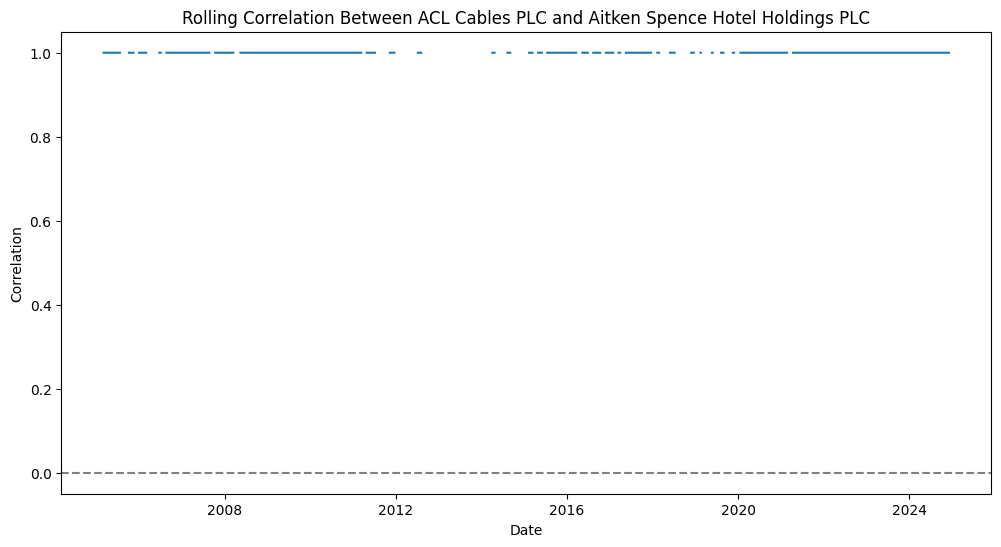

In [ ]:
rolling_window = 30  # 30-day rolling window

# Example: Rolling correlation between two companies
company_1 = companies[0]
company_2 = companies[1]

rolling_corr = data[data['Acquirer Name'].isin([company_1, company_2])].pivot_table(
    values='Return', index='Trade Date', columns='Acquirer Name'
).rolling(window=rolling_window).corr().unstack().iloc[:, 0]

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr.values)
plt.title(f'Rolling Correlation Between {company_1} and {company_2}')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.show()
